<a href="https://colab.research.google.com/github/dajebbar/1.exploratory-data-analysis-MLR/blob/master/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify columns with single value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from urllib.request import urlretrieve

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
urlretrieve(url, 'oil.csv')

('oil.csv', <http.client.HTTPMessage at 0x7fccc0879ad0>)

In [3]:
oil_df = pd.read_csv('oil.csv', header=None)
oil_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
oil_df.shape

(937, 50)

In [5]:
oil_df.nunique()

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

## Drop columns that contains one single value

In [6]:
counts = oil_df.nunique()
cols_to_del = [i for i, x in enumerate(counts) if x == 1]
print(cols_to_del)

[22]


In [7]:
oil_df.drop(columns=cols_to_del, axis=1, inplace=True)
oil_df.shape

(937, 49)

## Identify and drop columns with fiew values < 1%

In [8]:
oil_df.value_counts(normalize=True, dropna=False)

0    1    2        3        4    5         6      7      8       9     10     11    12    13    14    15    16       17      18    19    20    21      23    24       25     26     27     28    29     30     31    32   33    34  35    36    37     38   39  40       41      42      43      44    45  46        47     48     49
1    109  441.43   303.14   18   882900.0  52.11  16.85  7067.0  0.32  124.9  0.34  0.38  0.62  0.24  0.37  11.66    7.28    0.78  0.34  0.40  69.09   0.75  239.69    0.18  3.83    0.73  3.21  -3.38  -0.41  1.22  0.0  1.22  53  2790  0.00  56.57  102  73  2534.42  853.81  291.60  220.85  8.69  0   27407.50  65.90  7.55   1     0.001067
101  110  1586.95  942.99   1    275000.0  34.49  8.56   3400.0  0.25  80.9   0.24  0.30  0.50  0.17  0.33  55.45    14.29   1.99  0.21  0.29  75.26   0.46  351.67    0.18  9.24    0.93  4.54  -2.82  -0.62  2.17  0.0  2.17  47  2610  0.01  42.04  78   55  1150.00  350.00  191.30  93.73   6.01  0   7555.21   66.01  7.97   0     0.00106

In [9]:
counts = oil_df.nunique()
col_less_than_1 = [ i for i, x in enumerate(counts) if (
    float(x)/oil_df.shape[0]*100) < 1]

col_less_than_1

[21, 23, 24, 25, 31, 35, 37, 38, 44, 48]

In [10]:
oil_df.drop(columns=col_less_than_1, inplace=True)

In [11]:
oil_df.shape

(937, 39)

## Columns with low **variance**

In [12]:
from sklearn.feature_selection import VarianceThreshold

oil_df = pd.read_csv('oil.csv', header=None)

# split data into outputs and inputs

# data = oil_df.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]

X = oil_df.iloc[:, :-1]
y = oil_df.iloc[:, -1]
print(X.shape, y.shape)

# define the transform
transform = VarianceThreshold()

# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


---
# Duplicates Data

In [13]:
url = (
    'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b'
      '0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
urlretrieve(url, 'iris.csv')

('iris.csv', <http.client.HTTPMessage at 0x7fccc0329a10>)

In [14]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Calculate duplicates

In [15]:
dups = iris.duplicated()
# report if there are any duplicates
print(dups.any())

# list all duplicates raw
iris[dups]

True


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


## Delete rows of duplicate data from the dataset

In [16]:
print(iris.shape)
iris.drop_duplicates(inplace=True)
print(iris.shape)

(150, 5)
(147, 5)


---
# Remove Outliers

## A - Standard deviation approch:
### A-1 Generate Gaussian distribution

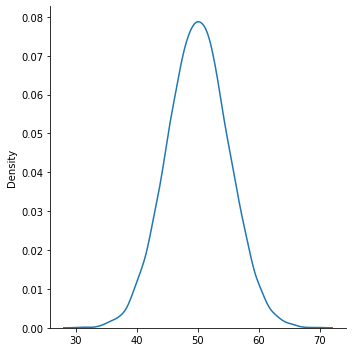

In [17]:
np.random.seed(42)
data = 5 * np.random.normal(size=10000) + 50
sns.displot(data, kind='kde')

### A-2 Calculate Summary statistics

In [18]:
mean_data, std_data = data.mean(), data.std()

mean_data, std_data

(49.98932008315787, 5.017061030649938)

### A-3 Define outliers

In [19]:
cut_off = 3 * std_data
lower, upper = mean_data - cut_off, mean_data + cut_off

### A-4 Identify outliers

In [20]:
outliers = [x for x in data if x < lower or x > upper]
print(f'Number of outlier: {len(outliers)}')

Number of outlier: 27


In [21]:
non_outliers = [x for x in data if x >= lower and x <= upper]
print(f'Number of non-outlier: {len(non_outliers)}')

Number of non-outlier: 9973


## B- IQR Approch

### B-1 Interquartile range

In [24]:
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print(f'IQR range: [25th={q25:.3f}, 75th={q75:.3f}]  , IQR = {iqr:.3f}')

IQR range: [25th=46.637, 75th=53.355]  , IQR = 6.718


### B-2 Calculate the outlier cutoff 

In [25]:
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

### B-3 Identify outliers


In [26]:
outliers = [x for x in data if x < lower or x > upper]
print(f'Numbers of outliers: {len(outliers)}')

Numbers of outliers: 83


### B-4 Non-outliers

In [27]:
non_outliers = [x for x in data if x >= lower and x <= upper]
print(f'Numbers of non-outliers: {len(non_outliers)}')

Numbers of non-outliers: 9917


## Summarizing

In [29]:
print(f'IQR range: [25th={q25:.3f}, 75th={q75:.3f}]  , IQR = {iqr:.3f}')
print(f'Numbers of outliers: {len(outliers)}')
print(f'Numbers of non-outliers: {len(non_outliers)}')

IQR range: [25th=46.637, 75th=53.355]  , IQR = 6.718
Numbers of outliers: 83
Numbers of non-outliers: 9917
